In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None # to supress dataframe warning

%matplotlib inline

In [2]:
df = pd.read_csv("Telco_customer_churn_processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [3]:
df.drop(['CustomerID', 'Count', 'Country', 'State','Lat Long',
       'Churn Score', 'CLTV'],axis=1,inplace = True)
df_copy = df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our data analysis won't be able to directly take in those features as inputs.

In [4]:
df["Senior Citizen"] = np.where(df["Senior Citizen"] == "Yes",1,0)
df["Partner"] = np.where(df["Partner"] == "Yes",1,0)
df["Dependents"] = np.where(df["Dependents"] == "Yes",1,0)
df["Phone Service"] = np.where(df["Phone Service"] == "Yes",1,0)
df["Multiple Lines"] = np.where(df["Multiple Lines"] == "Yes",1,0)
df["Online Security"] = np.where(df["Online Security"] == "Yes",1,0)
df["Online Backup"] = np.where(df["Online Backup"] == "Yes",1,0)
df["Device Protection"] = np.where(df["Device Protection"] == "Yes",1,0)
df["Tech Support"] = np.where(df["Tech Support"]  == "Yes",1,0)
df["Streaming TV"] = np.where(df["Streaming TV"] == "Yes",1,0)
df["Streaming Movies"] = np.where(df["Streaming Movies"] == "Yes",1,0)
df["Paperless Billing"] = np.where(df["Paperless Billing"] == "Yes",1,0)
df["Total Charges"] = pd.to_numeric(df['Total Charges'],errors='coerce')
df["Internet Service"] = np.where(df["Internet Service"] == "No",0,1)

In [5]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)
Contract = pd.get_dummies(df['Contract'],drop_first=True)
df.drop(['Contract','Payment Method'],axis=1,inplace=True)
df = pd.concat([df,Gender,Contract],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

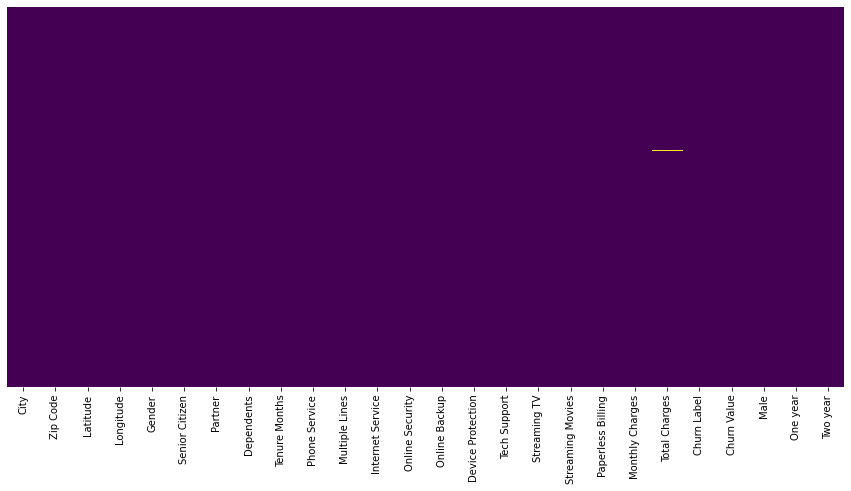

In [6]:
plt.figure(figsize = (15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

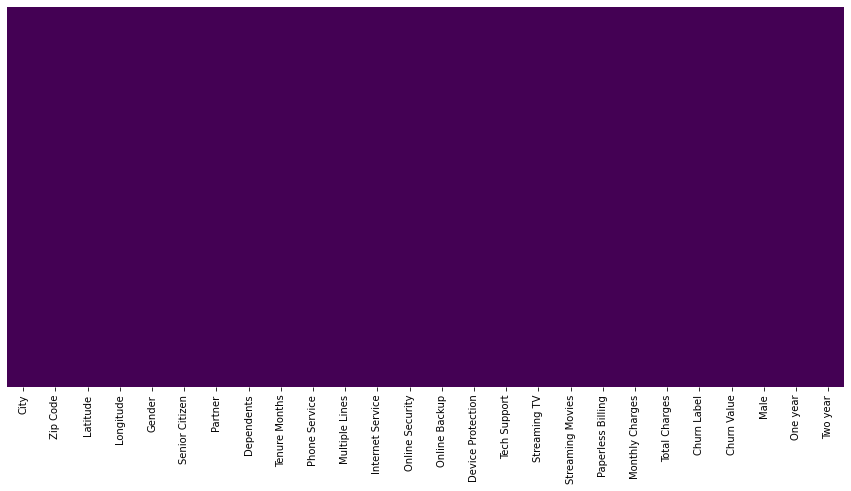

In [7]:
df.dropna(inplace=True)
plt.figure(figsize = (15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# Correlation
Using seaborn we can create a correlation heatmap between data columns

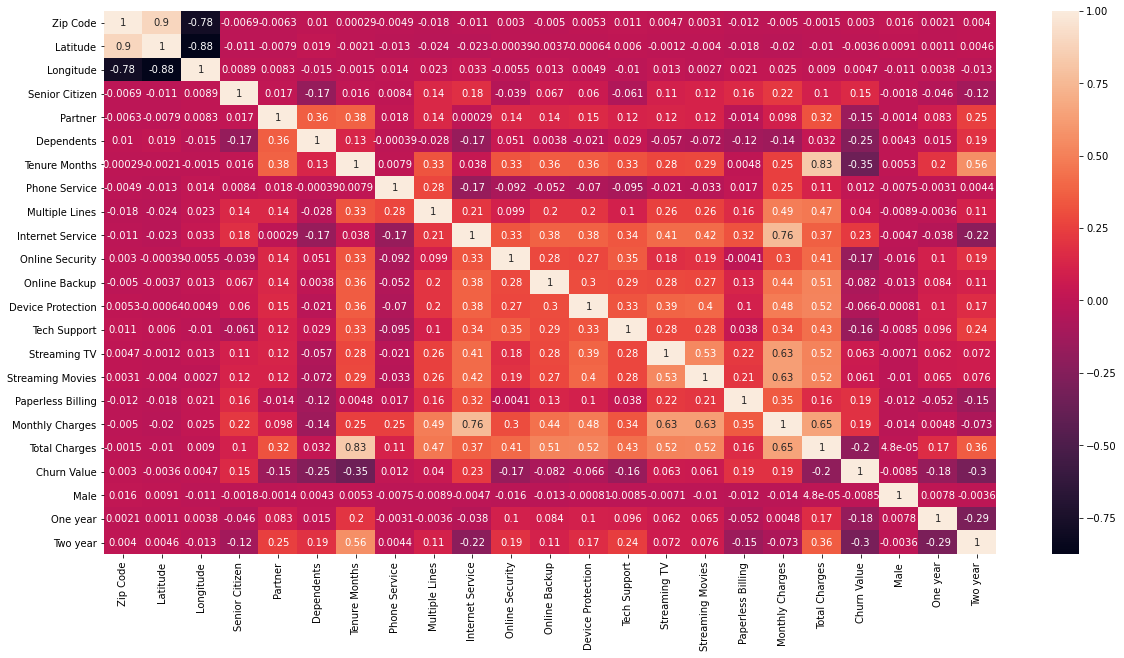

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Summary of Numerical attributes

In [9]:
df[["Tenure Months","Monthly Charges","Total Charges","Churn Label"]].query("`Churn Label` == 'Yes'").describe()

,Tenure Months,Monthly Charges,Total Charges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [10]:
df[["Tenure Months","Monthly Charges","Total Charges","Churn Label"]].query("`Churn Label` == 'No'").describe()

,Tenure Months,Monthly Charges,Total Charges
count,5163.00000,5163.000000,5163.000000
mean,37.65001,61.307408,2555.344141
std,24.07694,31.094557,2329.456984
min,1.00000,18.250000,18.800000
25%,15.00000,25.100000,577.825000
50%,38.00000,64.450000,1683.600000
75%,61.00000,88.475000,4264.125000
max,72.00000,118.750000,8672.450000


# Distribution of the Class label

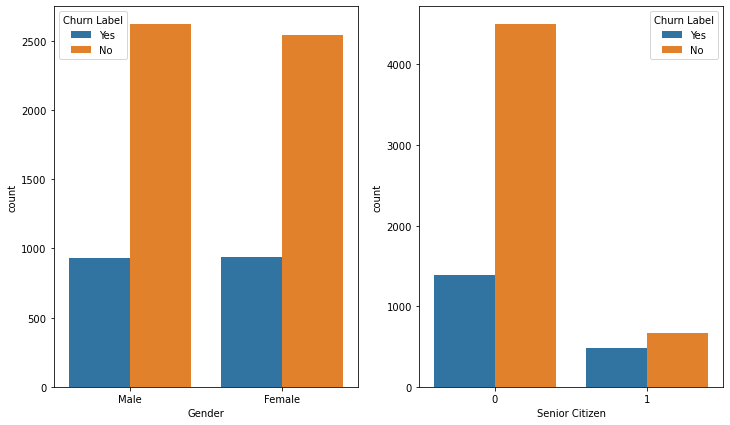

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.countplot(df["Gender"],hue=df["Churn Label"] ,ax=ax[0])
sns.countplot(df["Senior Citizen"],hue=df["Churn Label"], ax=ax[1])
plt.show()

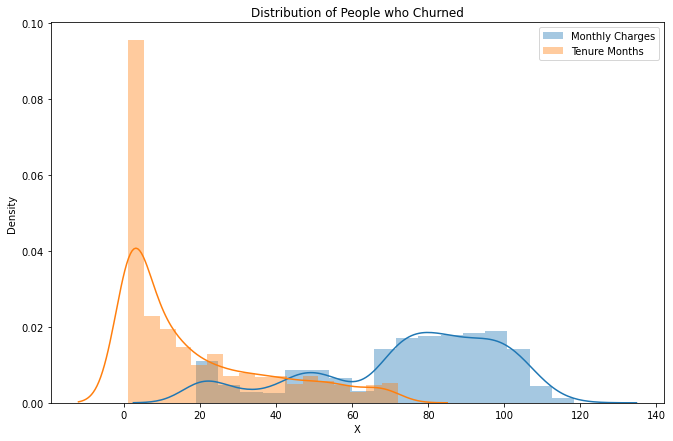

In [12]:
plt.figure(figsize=(11,7))
sns.distplot(df[['Monthly Charges','Churn Label']].query("`Churn Label` == 'Yes'").iloc[0:,0],label="Monthly Charges")
sns.distplot(df[['Tenure Months','Churn Label']].query("`Churn Label` == 'Yes'").iloc[0:,0],label="Tenure Months")
plt.legend()
plt.xlabel("X")
plt.title("Distribution of People who Churned")
plt.show()

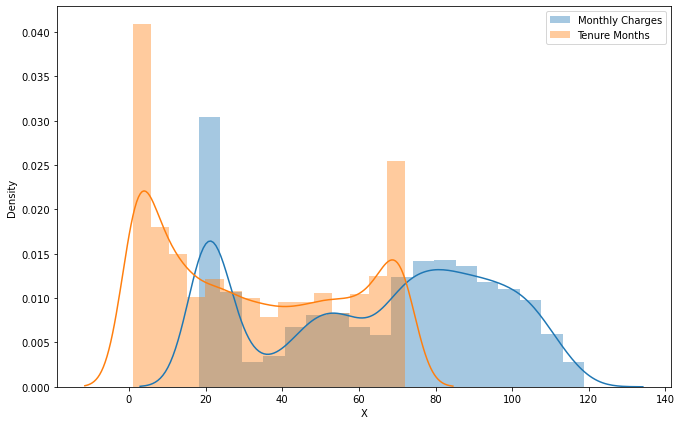

In [13]:
plt.figure(figsize=(11,7))
sns.distplot(df['Monthly Charges'],label="Monthly Charges")
sns.distplot(df['Tenure Months'],label="Tenure Months")
plt.legend()
plt.xlabel("X")
plt.show()

<Figure size 792x504 with 0 Axes>

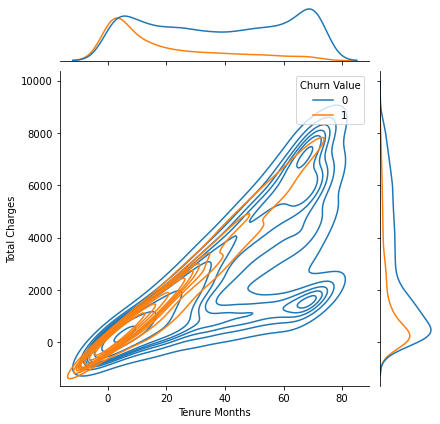

In [73]:
plt.figure(figsize=(11,7))
sns.jointplot(x = 'Tenure Months', y = 'Total Charges', data = df, kind = 'kde', hue = 'Churn Value')
plt.show()

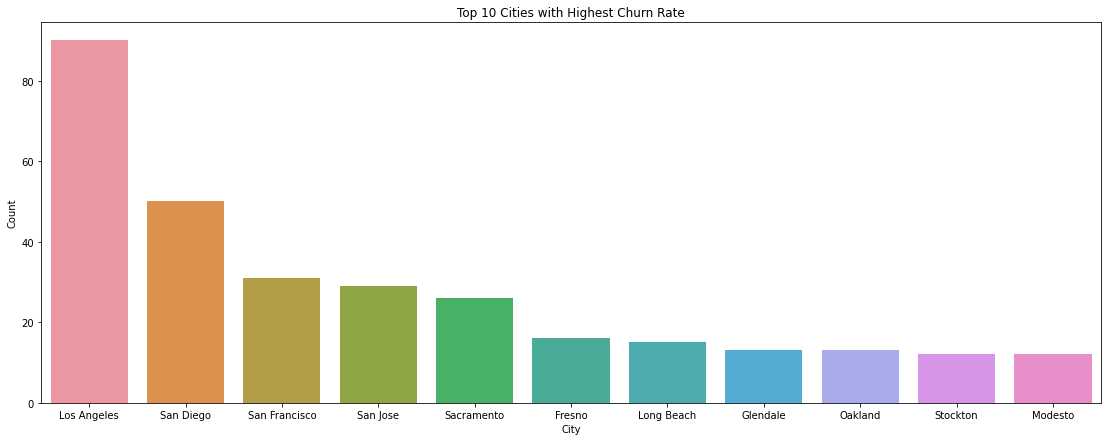

In [15]:
df_1 = df[["City","Churn Value"]].query("`Churn Value` == 1").iloc[:,0]
y = list(df_1.value_counts())
x = list(df_1.value_counts().index)

plt.figure(figsize=(19,7))
sns.barplot(x = x[0:11] , y = y[0:11])
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Top 10 Cities with Highest Churn Rate")
plt.show()

In [16]:
df_1 = df[["City","Monthly Charges","Churn Label"]]
x = list(df_1["City"].value_counts().index)[11:len(df_1)]
df_1 = df_1.set_index("City")
df_1.drop(x,inplace = True)
df_1 = df_1.reset_index()

df_2 = df_1[["City","Monthly Charges","Churn Label"]].groupby(["City","Churn Label"]).mean()
def highlight_max(s):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    is_max = s == s.max()
    return ['color: green' if v else '' for v in is_max]

def highlight_min(s):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    is_min = s == s.min()
    return ['color: red' if v else '' for v in is_min]

df_2.style.highlight_max(color= '#90ee90 ').highlight_min(color="#ffcccb").\
set_precision(2)


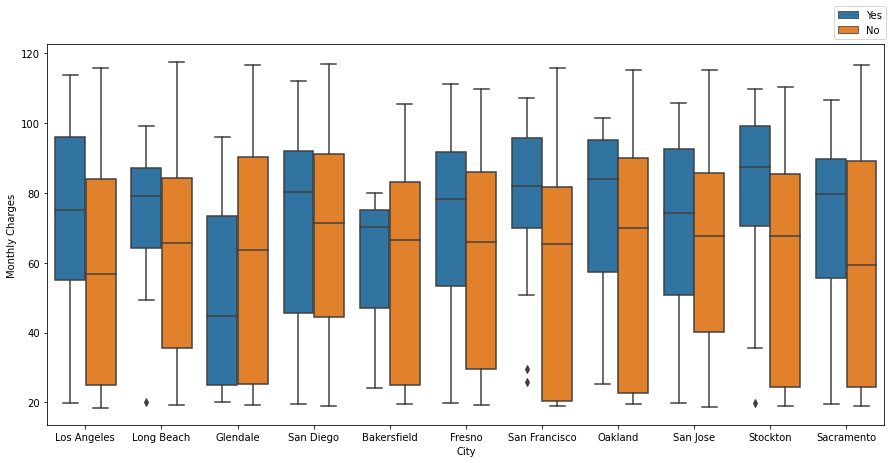

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "City", y = "Monthly Charges", hue="Churn Label", data = df_1)
plt.legend(bbox_to_anchor=(0.94, 1.1), loc='upper left', borderaxespad=0)
plt.show()

In [18]:
df.drop(['City','Gender'],axis=1,inplace=True)
df.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Male', 'One year', 'Two year'],
      dtype='object')

# Spliting dataset into Train and Test

In [19]:
from sklearn.model_selection import train_test_split

X = df[['Zip Code','Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Male', 'One year', 'Two year']]
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

def metrics(y_test, predictions):
    
    print(classification_report(y_test,predictions))
    print("####### Confusion Matrix\n",confusion_matrix(y_test,predictions))
    
    TN = confusion_matrix(y_test,predictions)[0][0]
    FP = confusion_matrix(y_test,predictions)[0][1]
    FN = confusion_matrix(y_test,predictions)[1][0]
    TP = confusion_matrix(y_test,predictions)[1][1]
    
    TPR = round(TP/(TP + FN),3)
    TNR = round(TN/(TN + FP),3)
    Accuracy = round((TN+TP)/ (len(y_test)),4)
    
    from sklearn import metrics
    print('\nMAE:', round(metrics.mean_absolute_error(y_test, predictions),4))
    print('MSE:', round(metrics.mean_squared_error(y_test, predictions),4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),4))

    return TPR, TNR, Accuracy

In [22]:
def cross_validate(e, X_train,  y_train):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = e, X = X_train, y = y_train, cv = 10)
    print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
    
    return accuracies.mean()*100

# Classification methods

In [72]:
############################## LogisticRegression ##############################
from sklearn.linear_model import LogisticRegression

def log_reg(X_train, y_train, X_test, y_test):
    print("\n############################## LogisticRegression ##############################\n")
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    lg_predict = logmodel.predict(X_test)
    TPR, TNR, log_accuracy = metrics(y_test, lg_predict)
    log_avg_accuracy = cross_validate(logmodel, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(log_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(log_avg_accuracy))

    return log_accuracy, log_avg_accuracy

log_accuracy, log_avg_accuracy = log_reg(X_train, y_train, X_test, y_test)


############################## LogisticRegression ##############################

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1678
           1       0.66      0.45      0.54       643

    accuracy                           0.78      2321
   macro avg       0.74      0.68      0.70      2321
weighted avg       0.77      0.78      0.77      2321

####### Confusion Matrix
 [[1529  149]
 [ 352  291]]

MAE: 0.2159
MSE: 0.2159
RMSE: 0.4646

Standard Deviation: 1.55 %

TPR = 0.453 
TNR = 0.911 
Accuracy = 78.41%

Average Accuracy using 10-fold Cross validation = 78.82%


In [24]:
############################## DecisionTree ##############################
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def d_tree(X_train, y_train, X_test, y_test):
    print("\n############################## DecisionTree ##############################\n")

    dtree = DecisionTreeClassifier(criterion ="entropy",random_state=64)
    dtree.fit(X_train,y_train)
    d_predict = dtree.predict(X_test)

    TPR, TNR, dtree_accuracy = metrics(y_test, d_predict)
    dtree_avg_accuracy = cross_validate(dtree, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(dtree_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(dtree_avg_accuracy))
    
    return dtree, dtree_accuracy, dtree_avg_accuracy

dtree, dtree_accuracy, dtree_avg_accuracy = d_tree(X_train, y_train, X_test, y_test)


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1678
           1       0.55      0.52      0.54       643

    accuracy                           0.75      2321
   macro avg       0.69      0.68      0.68      2321
weighted avg       0.75      0.75      0.75      2321

####### Confusion Matrix
 [[1405  273]
 [ 308  335]]

MAE: 0.2503
MSE: 0.2503
RMSE: 0.5003

Standard Deviation: 1.57 %

TPR = 0.521 
TNR = 0.837 
Accuracy = 74.97%

Average Accuracy using 10-fold Cross validation = 74.38%


In [25]:
############################## RandomForest ##############################
from sklearn.ensemble import RandomForestClassifier

error_rate = []
best_combo = []
for i in range(1,21):
    for j in range(1,11):
        rfc_test = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=j,random_state=64)
        rfc_test.fit(X_train, y_train)
        rfct_pred = rfc_test.predict(X_test) 
        error_rate.append((np.mean(rfct_pred != y_test)))
        best_combo.append([i,j])
        
print("\nBest Combination =",best_combo[error_rate.index(min(error_rate))] )
print("")
n = best_combo[error_rate.index(min(error_rate))][0]
d = best_combo[error_rate.index(min(error_rate))][1]

def rand_forest(X_train, y_train, X_test, y_test):
    
    print("\n############################## RandomForest ##############################")
    rfc = RandomForestClassifier(n_estimators=n,criterion='entropy',max_depth=d,random_state=64)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    TPR, TNR, rf_accuracy = metrics(y_test, rfc_pred)
    rf_avg_accuracy = cross_validate(rfc, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(rf_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(rf_avg_accuracy))
    
    return rfc, rf_accuracy, rf_avg_accuracy

rfc, rf_accuracy, rf_avg_accuracy = rand_forest(X_train, y_train, X_test, y_test)


Best Combination = [16, 9]


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1678
           1       0.71      0.51      0.60       643

    accuracy                           0.81      2321
   macro avg       0.77      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321

####### Confusion Matrix
 [[1547  131]
 [ 315  328]]

MAE: 0.1922
MSE: 0.1922
RMSE: 0.4384

Standard Deviation: 0.64 %

TPR = 0.51 
TNR = 0.922 
Accuracy = 80.78%

Average Accuracy using 10-fold Cross validation = 80.32%


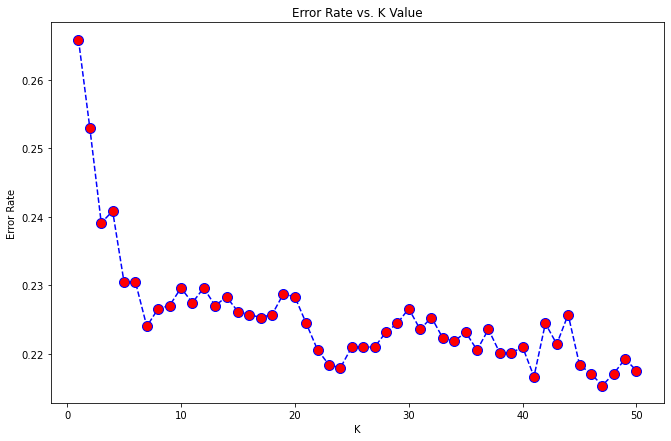

In [26]:
############################## KNeighbors ##############################
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(11,7))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [27]:
print("\n############################## KNeighbors ##############################")
best_k = error_rate.index((min(error_rate))) + 1
worst_k = error_rate.index((max(error_rate))) + 1

print("\nBest K is",best_k)
print("Worst K is",worst_k)

def KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test):
    knn = KNeighborsClassifier(n_neighbors = best_k,)
    knn.fit(X_train_scaled,y_train)
    k_pred = knn.predict(X_test_scaled)

    TPR, TNR, knn_accuracy = metrics(y_test, k_pred)
    knn_avg_accuracy = cross_validate(knn, X_train_scaled,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(knn_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(knn_avg_accuracy))
    
    return knn_accuracy, knn_avg_accuracy
knn_accuracy, knn_avg_accuracy = KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test)


############################## KNeighbors ##############################

Best K is 47
Worst K is 1
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1678
           1       0.63      0.55      0.59       643

    accuracy                           0.78      2321
   macro avg       0.73      0.71      0.72      2321
weighted avg       0.78      0.78      0.78      2321

####### Confusion Matrix
 [[1466  212]
 [ 288  355]]

MAE: 0.2154
MSE: 0.2154
RMSE: 0.4641

Standard Deviation: 1.44 %

TPR = 0.552 
TNR = 0.874 
Accuracy = 78.46%

Average Accuracy using 10-fold Cross validation = 79.32%


In [28]:
############################## GaussianNB ##############################
from sklearn.naive_bayes import GaussianNB

def Gaussian_NB(X_train, y_train, X_test, y_test):
    print("\n############################## GaussianNB ##############################\n")

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)

    TPR, TNR, nb_accuracy = metrics(y_test, nb_pred)
    nb_avg_accuracy = cross_validate(nb, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(nb_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(nb_avg_accuracy))
    
    return nb_accuracy, nb_avg_accuracy

nb_accuracy, nb_avg_accuracy = Gaussian_NB(X_train, y_train, X_test, y_test)


############################## GaussianNB ##############################

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1678
           1       0.54      0.77      0.64       643

    accuracy                           0.76      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.76      0.77      2321

####### Confusion Matrix
 [[1258  420]
 [ 145  498]]

MAE: 0.2434
MSE: 0.2434
RMSE: 0.4934

Standard Deviation: 2.00 %

TPR = 0.774 
TNR = 0.75 
Accuracy = 75.66%

Average Accuracy using 10-fold Cross validation = 75.63%


# Model Improvement

In [29]:
############################## DecisionTree Using Max Depth of Best RandomForest ##############################
def d_tree_m(d, X_train, y_train, X_test, y_test):
    print("\n########################## DecisionTree Using Max Depth of Best RandomForest ##########################\n")

    dtree_m = DecisionTreeClassifier(ccp_alpha=0.002, criterion ="entropy",max_depth=d,)
    dtree_m.fit(X_train, y_train)
    d_predict = dtree_m.predict(X_test)

    TPR, TNR, accuracy = metrics(y_test, d_predict)
    avg_accuracy = cross_validate(dtree_m, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(avg_accuracy))
    print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
    
    return accuracy, avg_accuracy

accuracy_m, avg_accuracy_m = d_tree_m(d, X_train, y_train, X_test, y_test)


########################## DecisionTree Using Max Depth of Best RandomForest ##########################

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1678
           1       0.61      0.63      0.62       643

    accuracy                           0.78      2321
   macro avg       0.73      0.74      0.73      2321
weighted avg       0.79      0.78      0.79      2321

####### Confusion Matrix
 [[1414  264]
 [ 238  405]]

MAE: 0.2163
MSE: 0.2163
RMSE: 0.4651

Standard Deviation: 1.70 %

TPR = 0.63 
TNR = 0.843 
Accuracy = 78.37%

Average Accuracy using 10-fold Cross validation = 79.13%

Accuracy changed by 3.4pp


# Using AdaBoost

In [30]:
def ada_boost(d, X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import AdaBoostClassifier
    
    for i in range(1,16):
        for j in (0.5,1):
            ada = AdaBoostClassifier(n_estimators =i , base_estimator = d , learning_rate = j, random_state=64)  
            ada.fit(X_train, y_train)
            ada_predict = ada.predict(X_test)
            error_rate.append(np.mean(ada_predict != y_test ))
            
    return error_rate, ada_predict

In [31]:
def create_dataframe(error_rate):
    
    df_temp = pd.DataFrame()
    df_temp["N"] = list(range(1,31))
    df_temp["Error_Rate"] = error_rate
    df_temp["Learning_Rate"] = np.where(df_temp.N <=15, 0.5,1)
    df_temp["N"] = list(range(1,16)) * 2
    
    return df_temp

In [32]:
from sklearn.ensemble import AdaBoostClassifier

def ada_main(e, X_train, y_train,X_test, y_test):
    error_rate, ada_predict = ada_boost(e , X_train, y_train,X_test, y_test)

    df_temp = create_dataframe(error_rate)

    best_lr =  df_temp.nsmallest(1,"Error_Rate").iloc[0][2]
    best_n = df_temp.nsmallest(1,"Error_Rate").iloc[0][0]

    ar_accuracy = ((1 - df_temp.nsmallest(1,"Error_Rate").iloc[0][1]))
    print(f"\nBest combination for learning rate λ and N is [{best_lr }, {best_n}] with Accuracy = {round(ar_accuracy*100,2)}%")
    print(f"\nAccuracy changed by {round((ar_accuracy - rf_accuracy)*100,2)}pp")

    ada = AdaBoostClassifier(n_estimators = int(best_n) , base_estimator = e , learning_rate = best_lr, random_state=64)  
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    TPR, TNR, ada_accuracy = metrics(y_test, ada_predict)
    print(f"\nTPR = {TPR} \nTNR = {TNR}")

In [33]:
print("\n######## AdaBoost with Best Performing Algorithm")
ada_main(rfc, X_train, y_train, X_test, y_test)


######## AdaBoost with Best Performing Algorithm

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 81.0%

Accuracy changed by 0.22pp
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1678
           1       0.71      0.54      0.61       643

    accuracy                           0.81      2321
   macro avg       0.77      0.73      0.74      2321
weighted avg       0.80      0.81      0.80      2321

####### Confusion Matrix
 [[1534  144]
 [ 297  346]]

MAE: 0.19
MSE: 0.19
RMSE: 0.4359

TPR = 0.538 
TNR = 0.914


In [34]:
print("\n######## AdaBoost with Worst Performing Algorithm")
ada_main(None, X_train, y_train, X_test, y_test)


######## AdaBoost with Worst Performing Algorithm

Best combination for learning rate λ and N is [1.0, 15.0] with Accuracy = 79.41%

Accuracy changed by -1.37pp
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1678
           1       0.66      0.54      0.59       643

    accuracy                           0.79      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1498  180]
 [ 298  345]]

MAE: 0.2059
MSE: 0.2059
RMSE: 0.4538

TPR = 0.537 
TNR = 0.893


In [35]:
############################## GradientBoostingClassifier ##############################
print("\n########################## GradientBoostingClassifier ##########################\n")
def grad_boost(X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import GradientBoostingClassifier
    
    for i in range(1,51):
        for j in np.linspace(0.1,1,10):
            gb = GradientBoostingClassifier(n_estimators=i, learning_rate=j, random_state=64) 
            gb.fit(X_train, y_train)
            gd_predict = gb.predict(X_test)
            error_rate.append(np.mean(gd_predict != y_test ))
            
    return min(error_rate), gd_predict

error_rate, gd_predict = grad_boost(X_train, y_train,X_test, y_test)
print(f"Accuracy using GradientBoosting {round((1 - error_rate) * 100, 2)}%")


########################## GradientBoostingClassifier ##########################

Accuracy using GradientBoosting 81.04%


# Dimensionality Reduction
### In this part we will cover the following Feature Extraction techniques:
    1. Principal Component Analysis (PCA)
    2. Linear Discriminant Analysis (LDA)
    3. Quadratic Discriminant Analysis (QDA)

In [36]:
############################## PrincipalComponentAnalysis ##############################
print("\n############################## PrincipalComponentAnalysis ##############################\n")

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=64)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nExplained Variance Ratio:",pca.explained_variance_ratio_)
print("Noise Variance:",round(pca.noise_variance_,3))


############################## PrincipalComponentAnalysis ##############################


Explained Variance Ratio: [0.22876347 0.12372685]
Noise Variance: 0.712


In [37]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1678
           1       0.51      0.10      0.17       643

    accuracy                           0.72      2321
   macro avg       0.62      0.53      0.50      2321
weighted avg       0.67      0.72      0.65      2321

####### Confusion Matrix
 [[1615   63]
 [ 578   65]]

MAE: 0.2762
MSE: 0.2762
RMSE: 0.5255

Standard Deviation: 0.70 %

TPR = 0.101 
TNR = 0.962 
Accuracy = 72.38%

Average Accuracy using 10-fold Cross validation = 74.29%

Accuracy changed by -8.4pp
Mean Accuracy changed by -6.0pp


In [38]:
print("\n######## PCA-AdaBoost")
ada_main(rfc, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 4.0] with Accuracy = 72.99%

Accuracy changed by -7.79pp
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1678
           1       0.54      0.12      0.20       643

    accuracy                           0.73      2321
   macro avg       0.64      0.54      0.52      2321
weighted avg       0.69      0.73      0.66      2321

####### Confusion Matrix
 [[1612   66]
 [ 564   79]]

MAE: 0.2714
MSE: 0.2714
RMSE: 0.521

TPR = 0.123 
TNR = 0.961


In [39]:
dtree, accuracy, avg_accuracy = d_tree(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1678
           1       0.37      0.34      0.35       643

    accuracy                           0.66      2321
   macro avg       0.56      0.56      0.56      2321
weighted avg       0.65      0.66      0.65      2321

####### Confusion Matrix
 [[1311  367]
 [ 427  216]]

MAE: 0.3421
MSE: 0.3421
RMSE: 0.5849

Standard Deviation: 1.42 %

TPR = 0.336 
TNR = 0.781 
Accuracy = 65.79%

Average Accuracy using 10-fold Cross validation = 65.95%

Accuracy changed by -9.18pp
Mean Accuracy changed by -8.4pp


In [40]:
print("\n######## PCA-AdaBoost")
ada_main(dtree, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 65.36%

Accuracy changed by -15.42pp
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1678
           1       0.36      0.33      0.34       643

    accuracy                           0.65      2321
   macro avg       0.56      0.55      0.55      2321
weighted avg       0.64      0.65      0.65      2321

####### Confusion Matrix
 [[1307  371]
 [ 433  210]]

MAE: 0.3464
MSE: 0.3464
RMSE: 0.5886

TPR = 0.327 
TNR = 0.779


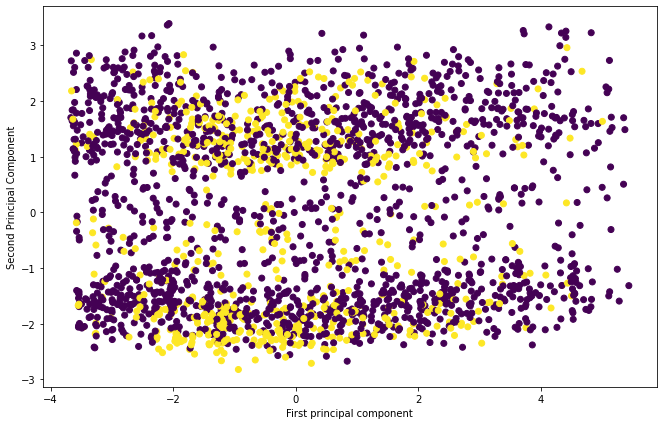

In [41]:
plt.figure(figsize=(11,7))
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c = (y_test))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

This heatmap represent the correlation between the various feature and the principal component itself.

<Figure size 792x504 with 0 Axes>

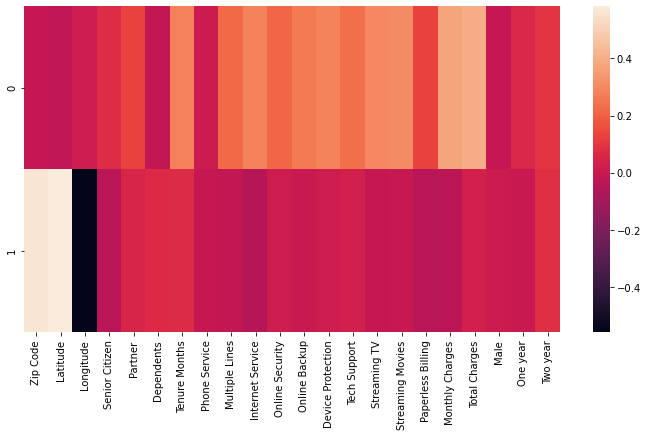

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=X_test.columns)

plt.figure(figsize=(11,7))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)
plt.show()

In [43]:
############################## LinearDiscriminantAnalysis ##############################
print("\n############################## LinearDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


############################## LinearDiscriminantAnalysis ##############################



In [44]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1678
           1       0.69      0.48      0.56       643

    accuracy                           0.80      2321
   macro avg       0.75      0.70      0.72      2321
weighted avg       0.78      0.80      0.78      2321

####### Confusion Matrix
 [[1538  140]
 [ 335  308]]

MAE: 0.2047
MSE: 0.2047
RMSE: 0.4524

Standard Deviation: 1.71 %

TPR = 0.479 
TNR = 0.917 
Accuracy = 79.53%

Average Accuracy using 10-fold Cross validation = 79.79%

Accuracy changed by -1.25pp
Mean Accuracy changed by -0.5pp


In [45]:
print("\n######## LDA-AdaBoost")
ada_main(rfc, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 79.58%

Accuracy changed by -1.2pp
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1678
           1       0.68      0.48      0.56       643

    accuracy                           0.79      2321
   macro avg       0.75      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321

####### Confusion Matrix
 [[1530  148]
 [ 333  310]]

MAE: 0.2072
MSE: 0.2072
RMSE: 0.4552

TPR = 0.482 
TNR = 0.912


In [46]:
dtree, accuracy, avg_accuracy = d_tree(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1678
           1       0.52      0.50      0.51       643

    accuracy                           0.73      2321
   macro avg       0.66      0.66      0.66      2321
weighted avg       0.73      0.73      0.73      2321

####### Confusion Matrix
 [[1374  304]
 [ 319  324]]

MAE: 0.2684
MSE: 0.2684
RMSE: 0.5181

Standard Deviation: 1.85 %

TPR = 0.504 
TNR = 0.819 
Accuracy = 73.16%

Average Accuracy using 10-fold Cross validation = 74.76%

Accuracy changed by -1.81pp
Mean Accuracy changed by 0.4pp


In [47]:
print("\n######## LDA-AdaBoost")
ada_main(dtree, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 73.16%

Accuracy changed by -7.62pp
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1678
           1       0.52      0.50      0.51       643

    accuracy                           0.73      2321
   macro avg       0.66      0.66      0.66      2321
weighted avg       0.73      0.73      0.73      2321

####### Confusion Matrix
 [[1374  304]
 [ 319  324]]

MAE: 0.2684
MSE: 0.2684
RMSE: 0.5181

TPR = 0.504 
TNR = 0.819


In [48]:
############################## QuadraticDiscriminantAnalysis ##############################
print("\n############################## QuadraticDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_classifier = QDA()
X_train_qda = qda_classifier.fit(X_train_scaled, y_train)
qda_predicted = qda_classifier.predict(X_test_scaled)

TPR, TNR, accuracy = metrics(y_test, qda_predicted)
print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")



############################## QuadraticDiscriminantAnalysis ##############################

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1678
           1       0.55      0.76      0.64       643

    accuracy                           0.76      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.76      0.77      2321

####### Confusion Matrix
 [[1277  401]
 [ 153  490]]

MAE: 0.2387
MSE: 0.2387
RMSE: 0.4886

TPR = 0.762 
TNR = 0.761 
Accuracy = 76.13%


# Feature Selection


In [49]:
############################## RecursiveFeatureElimination ##############################
print("\n############################## RecursiveFeatureElimination ##############################\n")

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logmodel = LogisticRegression(solver='lbfgs')
rfe = RFE(logmodel, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

col = []
for i in range(0, len(fit.ranking_)):
    if fit.ranking_[i] != 1:
        a = list(X.columns)[i]
        col.append(a)
        
X_train_rfe = X_train.drop(col, axis= 1)
X_test_rfe = X_test.drop(col, axis= 1)


############################## RecursiveFeatureElimination ##############################

Num Features: 6
Selected Features: [False False False False False  True False False False  True  True False
 False  True False False False False False False  True  True]
Feature Ranking: [17 12 14  6  7  1  9  5  4  1  1  3  8  1 13 15  2 10 16 11  1  1]


In [50]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

Standard Deviation: 1.77 %

TPR = 0.622 
TNR = 0.847 
Accuracy = 78.5%

Average Accuracy using 10-fold Cross validation = 78.22%

Accuracy changed by -2.28pp
Mean Accuracy changed by -2.1pp


In [51]:
print("\n######## RFE-AdaBoost")
ada_main(rfc, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.5%

Accuracy changed by -2.28pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

TPR = 0.622 
TNR = 0.847


In [52]:
dtree, accuracy, avg_accuracy = d_tree(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

Standard Deviation: 1.77 %

TPR = 0.622 
TNR = 0.847 
Accuracy = 78.5%

Average Accuracy using 10-fold Cross validation = 78.22%

Accuracy changed by 3.53pp
Mean Accuracy changed by 3.8pp


In [53]:
print("\n######## RFE-AdaBoost")
ada_main(dtree, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.5%

Accuracy changed by -2.28pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

TPR = 0.622 
TNR = 0.847


In [54]:
############################## ANOVA Feature Selection ##############################
print("\n############################## ANOVA Feature Selection ##############################\n")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

afs = SelectKBest(score_func=f_classif, k=4)

X_train_k = afs.fit_transform(X_train, y_train)
X_test_k = afs.transform(X_test)


############################## ANOVA Feature Selection ##############################



In [55]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.67      0.41      0.51       643

    accuracy                           0.78      2321
   macro avg       0.74      0.67      0.68      2321
weighted avg       0.77      0.78      0.76      2321

####### Confusion Matrix
 [[1551  127]
 [ 382  261]]

MAE: 0.2193
MSE: 0.2193
RMSE: 0.4683

Standard Deviation: 1.60 %

TPR = 0.406 
TNR = 0.924 
Accuracy = 78.07%

Average Accuracy using 10-fold Cross validation = 77.65%

Accuracy changed by -2.71pp
Mean Accuracy changed by -2.7pp


In [56]:
print("\n######## ANOVA-AdaBoost")
ada_main(rfc, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [1.0, 4.0] with Accuracy = 78.07%

Accuracy changed by -2.71pp
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1678
           1       0.64      0.43      0.52       643

    accuracy                           0.77      2321
   macro avg       0.72      0.67      0.68      2321
weighted avg       0.76      0.77      0.76      2321

####### Confusion Matrix
 [[1520  158]
 [ 365  278]]

MAE: 0.2253
MSE: 0.2253
RMSE: 0.4747

TPR = 0.432 
TNR = 0.906


In [57]:
dtree, accuracy, avg_accuracy = d_tree(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.66      0.41      0.50       643

    accuracy                           0.78      2321
   macro avg       0.73      0.66      0.68      2321
weighted avg       0.76      0.78      0.76      2321

####### Confusion Matrix
 [[1542  136]
 [ 382  261]]

MAE: 0.2232
MSE: 0.2232
RMSE: 0.4724

Standard Deviation: 1.31 %

TPR = 0.406 
TNR = 0.919 
Accuracy = 77.68%

Average Accuracy using 10-fold Cross validation = 77.52%

Accuracy changed by 2.71pp
Mean Accuracy changed by 3.1pp


In [58]:
print("\n######## ANOVA-AdaBoost")
ada_main(dtree, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 77.68%

Accuracy changed by -3.1pp
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.66      0.41      0.50       643

    accuracy                           0.78      2321
   macro avg       0.73      0.66      0.68      2321
weighted avg       0.76      0.78      0.76      2321

####### Confusion Matrix
 [[1542  136]
 [ 382  261]]

MAE: 0.2232
MSE: 0.2232
RMSE: 0.4724

TPR = 0.406 
TNR = 0.919


In [59]:
############################## Estimate Mutual Information ##############################
print("\n############################## Estimate Mutual Information ##############################\n")

from sklearn.feature_selection import mutual_info_classif

micf = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=64)

col = []
for i in range(0, len(micf)):
    if micf[i] < 0.009 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_emi = X_train.drop(col, axis= 1)
X_test_emi = X_test.drop(col, axis= 1)


############################## Estimate Mutual Information ##############################



In [60]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1678
           1       0.68      0.53      0.60       643

    accuracy                           0.80      2321
   macro avg       0.76      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321

####### Confusion Matrix
 [[1515  163]
 [ 300  343]]

MAE: 0.1995
MSE: 0.1995
RMSE: 0.4466

Standard Deviation: 1.12 %

TPR = 0.533 
TNR = 0.903 
Accuracy = 80.05%

Average Accuracy using 10-fold Cross validation = 80.05%

Accuracy changed by -0.73pp
Mean Accuracy changed by -0.3pp


In [61]:
print("\n######## EMI-AdaBoost")
ada_main(rfc, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 80.53%

Accuracy changed by -0.25pp
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1678
           1       0.69      0.53      0.60       643

    accuracy                           0.80      2321
   macro avg       0.76      0.72      0.74      2321
weighted avg       0.79      0.80      0.80      2321

####### Confusion Matrix
 [[1525  153]
 [ 302  341]]

MAE: 0.196
MSE: 0.196
RMSE: 0.4428

TPR = 0.53 
TNR = 0.909


In [62]:
print("\n######## EMI-AdaBoost")
ada_main(dtree, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 75.57%

Accuracy changed by -5.21pp
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1678
           1       0.56      0.56      0.56       643

    accuracy                           0.76      2321
   macro avg       0.69      0.69      0.69      2321
weighted avg       0.76      0.76      0.76      2321

####### Confusion Matrix
 [[1397  281]
 [ 286  357]]

MAE: 0.2443
MSE: 0.2443
RMSE: 0.4943

TPR = 0.555 
TNR = 0.833


In [63]:
dtree, accuracy, avg_accuracy = d_tree(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1678
           1       0.56      0.56      0.56       643

    accuracy                           0.75      2321
   macro avg       0.69      0.70      0.69      2321
weighted avg       0.76      0.75      0.75      2321

####### Confusion Matrix
 [[1387  291]
 [ 280  363]]

MAE: 0.246
MSE: 0.246
RMSE: 0.496

Standard Deviation: 1.25 %

TPR = 0.565 
TNR = 0.827 
Accuracy = 75.4%

Average Accuracy using 10-fold Cross validation = 73.66%

Accuracy changed by 0.43pp
Mean Accuracy changed by -0.7pp


In [64]:
############################## Feature Importance with Extra Trees Classifier ##############################
print("\n############################ Feature Importance with Extra Trees Classifier ############################\n")

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10,random_state=64,criterion='entropy')
etc.fit(X_train, y_train)
print(etc.feature_importances_)

col = []
for i in range(0, len(etc.feature_importances_)):
    if etc.feature_importances_[i] >= 0.075 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_etc = X_train.drop(col, axis= 1)
X_test_etc = X_test.drop(col, axis= 1)


############################ Feature Importance with Extra Trees Classifier ############################

[0.07731905 0.0756582  0.07805781 0.02261004 0.0331264  0.04705895
 0.11022524 0.00961093 0.02319544 0.02578885 0.03140201 0.02543029
 0.02453541 0.02180531 0.01869037 0.02375501 0.02395794 0.10313439
 0.09723373 0.0327991  0.03215572 0.06244978]


In [65]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1678
           1       0.63      0.52      0.57       643

    accuracy                           0.78      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.77      0.78      0.77      2321

####### Confusion Matrix
 [[1478  200]
 [ 308  335]]

MAE: 0.2189
MSE: 0.2189
RMSE: 0.4678

Standard Deviation: 0.96 %

TPR = 0.521 
TNR = 0.881 
Accuracy = 78.11%

Average Accuracy using 10-fold Cross validation = 78.33%

Accuracy changed by -2.67pp
Mean Accuracy changed by -2.0pp


In [66]:
print("\n######## ETC-AdaBoost")
ada_main(rfc, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [0.5, 5.0] with Accuracy = 77.77%

Accuracy changed by -3.01pp
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1678
           1       0.60      0.51      0.55       643

    accuracy                           0.77      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.76      0.77      0.76      2321

####### Confusion Matrix
 [[1462  216]
 [ 318  325]]

MAE: 0.2301
MSE: 0.2301
RMSE: 0.4797

TPR = 0.505 
TNR = 0.871


In [67]:
print("\n######## ETC-AdaBoost")
ada_main(dtree, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 74.97%

Accuracy changed by -5.81pp
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1678
           1       0.54      0.44      0.48       643

    accuracy                           0.74      2321
   macro avg       0.67      0.65      0.65      2321
weighted avg       0.73      0.74      0.73      2321

####### Confusion Matrix
 [[1435  243]
 [ 363  280]]

MAE: 0.2611
MSE: 0.2611
RMSE: 0.511

TPR = 0.435 
TNR = 0.855


In [68]:
dtree, accuracy, avg_accuracy = d_tree(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1678
           1       0.55      0.44      0.49       643

    accuracy                           0.75      2321
   macro avg       0.68      0.65      0.66      2321
weighted avg       0.73      0.75      0.74      2321

####### Confusion Matrix
 [[1449  229]
 [ 362  281]]

MAE: 0.2546
MSE: 0.2546
RMSE: 0.5046

Standard Deviation: 2.01 %

TPR = 0.437 
TNR = 0.864 
Accuracy = 74.54%

Average Accuracy using 10-fold Cross validation = 73.47%

Accuracy changed by -0.43pp
Mean Accuracy changed by -0.9pp


In [69]:
from xgboost import XGBClassifier
def xg_boost(X_train, y_train, X_test, y_test):
    
    ############################## XGBClassifier ##############################
    print("\n############################## XGBClassifier ##############################\n")
    
    best_combo_xg = []
    error_rate_xg = []
    for i in range(1,51):
            for j in np.linspace(0.1,1,10):
                for q in range(1,11):
                    xgb = XGBClassifier(n_estimators = i, learning_rate=j, max_depth=q, 
                                        eval_metric='mlogloss', tree_method="hist")
                    xgb.fit(X_train, y_train)
                    xg_pred = xgb.predict(X_test)
                    error_rate_xg.append(np.mean(xg_pred != y_test ))
                    best_combo_xg.append([i,j,q])

    best_combo_xg[error_rate_xg.index(min(error_rate_xg))]
    n = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][0]
    lr = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][1]
    de = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][2]
    
    xgb = XGBClassifier(n_estimators = n, learning_rate = lr, max_depth = de, 
                        eval_metric = 'mlogloss', tree_method = "hist", random_state = 64)
    xgb.fit(X_train, y_train)
    xg_pred = xgb.predict(X_test)
    
    TPR, TNR, accuracy = metrics(y_test, xg_pred)
    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")

In [70]:
xg_boost(X_train_scaled, y_train, X_test_scaled, y_test)


############################## XGBClassifier ##############################

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1678
           1       0.70      0.56      0.63       643

    accuracy                           0.81      2321
   macro avg       0.77      0.74      0.75      2321
weighted avg       0.81      0.81      0.81      2321

####### Confusion Matrix
 [[1525  153]
 [ 280  363]]

MAE: 0.1866
MSE: 0.1866
RMSE: 0.4319

TPR = 0.565 
TNR = 0.909 
Accuracy = 81.34%
